<a href="https://colab.research.google.com/github/carloslme/data-engineering-bootcamp/blob/main/Technical_Challenge_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The Customer Service team at Profeco (Mexican Consumer Protection Agency) wants to analyze the monitored products in Mexico. The IT team downloaded the database into an Google Drive on a CSV file of about 20GB.


Your task as a Data Engineer is processing the data and creating an exploratory analysis with Python Pandas without using pure Python functions.


# Import dependencies

In [1]:
# Common imports
import numpy as np
import os

# Parquet imports
import pyarrow as pa
import pyarrow.parquet as pq

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Processing sample data

## Getting sample data

In [2]:
!git clone https://github.com/wizelineacademy/data-engineering-bootcamp.git

Cloning into 'data-engineering-bootcamp'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 21 (delta 5), reused 15 (delta 3), pack-reused 0
Unpacking objects: 100% (21/21), done.


## Exploratory analysis for sample data

In [ ]:
df = pd.read_csv('/content/data-engineering-bootcamp/data/sample.csv')
df.head(5)

,producto,presentacion,marca,categoria,catalogo,precio,fechaRegistro,cadenaComercial,giro,nombreComercial,direccion,estado,municipio,latitud,longitud
0,CUADERNO FORMA ITALIANA,96 HOJAS PASTA DURA. CUADRICULA CHICA,ESTRELLA,MATERIAL ESCOLAR,UTILES ESCOLARES,25.9,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.29699,-99.125417
1,CRAYONES,CAJA 12 CERAS. JUMBO. C.B. 201423,CRAYOLA,MATERIAL ESCOLAR,UTILES ESCOLARES,27.5,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.29699,-99.125417
2,CRAYONES,CAJA 12 CERAS. TAMANO REGULAR C.B. 201034,CRAYOLA,MATERIAL ESCOLAR,UTILES ESCOLARES,13.9,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.29699,-99.125417
3,COLORES DE MADERA,CAJA 12 PIEZAS LARGO. TRIANGULAR. C.B. 640646,PINCELIN,MATERIAL ESCOLAR,UTILES ESCOLARES,46.9,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.29699,-99.125417
4,COLOR LARGO,CAJA 36 PIEZAS. CON SACAPUNTAS. 68-4036,CRAYOLA,MATERIAL ESCOLAR,UTILES ESCOLARES,115.0,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.29699,-99.125417


In [ ]:
df.describe()

,precio,latitud,longitud
count,1999.000000,1229.000000,1229.000000
mean,293.945953,19.399105,-99.185158
std,1270.865893,0.048795,0.032065
min,1.200000,19.296990,-99.233180
25%,13.500000,19.366903,-99.181344
50%,26.100000,19.366903,-99.181344
75%,56.100000,19.400879,-99.181344
max,13497.000000,19.483909,-99.125417


In [ ]:
df.columns

Index(['producto', 'presentacion', 'marca', 'categoria', 'catalogo', 'precio',
       'fechaRegistro', 'cadenaComercial', 'giro', 'nombreComercial',
       'direccion', 'estado', 'municipio', 'latitud', 'longitud'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   producto         1999 non-null   object 
 1   presentacion     1999 non-null   object 
 2   marca            1999 non-null   object 
 3   categoria        1999 non-null   object 
 4   catalogo         1999 non-null   object 
 5   precio           1999 non-null   float64
 6   fechaRegistro    1999 non-null   object 
 7   cadenaComercial  1999 non-null   object 
 8   giro             1999 non-null   object 
 9   nombreComercial  1999 non-null   object 
 10  direccion        1999 non-null   object 
 11  estado           1999 non-null   object 
 12  municipio        1999 non-null   object 
 13  latitud          1229 non-null   float64
 14  longitud         1229 non-null   float64
dtypes: float64(3), object(12)
memory usage: 234.4+ KB


## Exploring numerical features

Precio Count


15.90     17
29.90     12
49.90     12
12.50     11
13.50     11
          ..
19.75      1
171.47     1
218.00     1
36.50      1
31.65      1
Name: precio, Length: 1014, dtype: int64

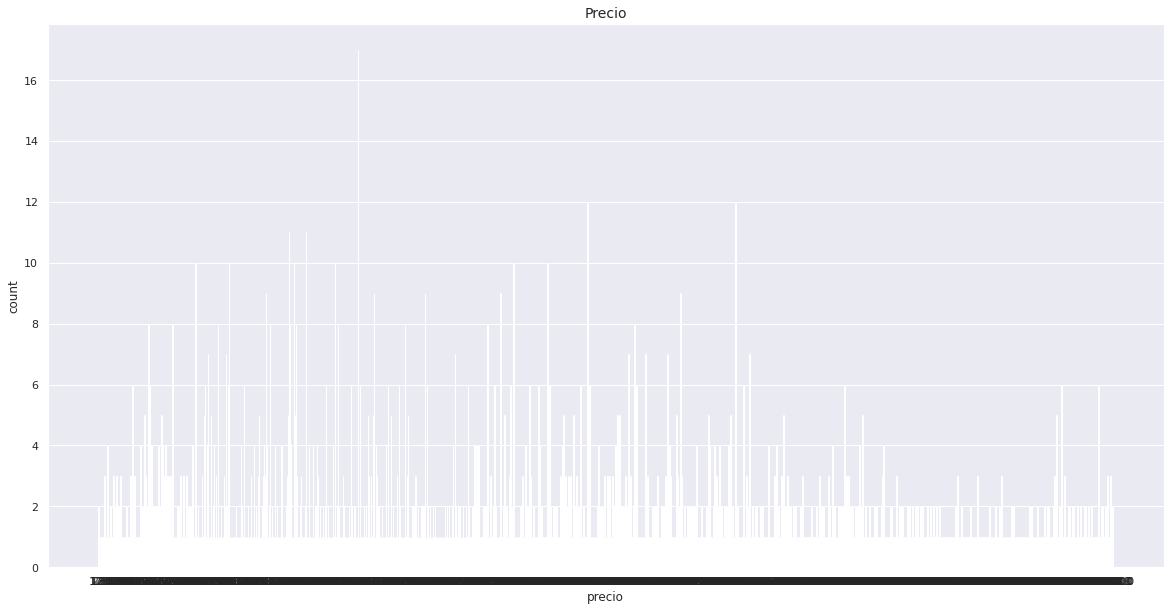

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})

sns.countplot('precio', data=df)
plt.title('Precio', fontsize=14)
plt.plot()

print('Precio Count')
df['precio'].value_counts()

## Exploring text features
 * producto - object 
 * presentacion - object 
 * marca - object 
 * categoria - object 
 * catalogo - object 
 * fechaRegistro - object 
 * cadenaComercial - object 
 * giro - object 
 * nombreComercial - object 
 * direccion - object 
 * estado - object 
 * municipio - object 

Feature `producto`

In [ ]:
print('INFO: There are {} categories in the feature `producto`.'.format(len(df.producto.value_counts())))
print('INFO: Some examples')
df.producto.value_counts()

INFO: There are 330 categories in the feature `producto`.
INFO: Some examples


DETERGENTE P/ROPA          49
REFRESCO                   48
LECHE ULTRAPASTEURIZADA    40
CHILES EN LATA             39
MAYONESA                   37
                           ..
CAPOTENA                    1
DICLOXACILINA               1
CAMARON SECO                1
CISAPRIDA                   1
VILONA                      1
Name: producto, Length: 330, dtype: int64

Feature `presentacion`

In [ ]:
print('INFO: There are {} categories in the feature `presentacion`.'.format(len(df.presentacion.value_counts())))
print('INFO: Some examples')
df.presentacion.value_counts()

INFO: There are 767 categories in the feature `presentacion`.
INFO: Some examples


1 KG. GRANEL                                                                                            27
1 KG.                                                                                                   19
CAJA                                                                                                    16
BOLSA 1 KG. POLVO                                                                                       15
BOLSA 400 GR.                                                                                           14
                                                                                                        ..
TRANSPARENTE DE 25 A 100 WATTS                                                                           1
SDR-T51. FORMATO MEMORIA INTERNA. ZOOM OPTICO DIGITAL 78X/N/I. FUNCION DE CAMARA DIGITAL. PUERTO USB     1
W200. VAPOR. SUELA ANTIADHERENTE                                                                         1
CAJA CON 10 TABLETAS 10 MG.          

Feature `marca`

In [ ]:
print('INFO: There are {} categories in the feature `marca`.'.format(len(df.marca.value_counts())))
print('INFO: Some examples')
df.marca.value_counts()

INFO: There are 395 categories in the feature `marca`.
INFO: Some examples


S/M                      397
LA COSTENA                62
SONY                      28
HERDEZ                    28
SIN MARCA                 28
                        ... 
MERCK-MEXICO, S.A.         1
ZWAN                       1
BOHEMIA.                   1
MORELIA. PRESIDENCIAL      1
ALBERTO. VO5               1
Name: marca, Length: 395, dtype: int64

Feature `categoria`

In [ ]:
print('INFO: There are {} categories in the feature `categoria`.'.format(len(df.categoria.value_counts())))
print('INFO: Some examples')
df.categoria.value_counts()

INFO: There are 36 categories in the feature `categoria`.
INFO: Some examples


ARTS. PARA EL CUIDADO PERSONAL        197
CARNES FRIAS SECAS Y EMBUTIDOS        136
DETERGENTES Y PRODUCTOS SIMILARES     124
FRUTAS Y LEGUMBRES PROCESADAS         124
CONDIMENTOS                           123
MEDICAMENTOS                          122
DERIVADOS DE LECHE                    117
REFRESCOS ENVASADOS                    95
LECHE PROCESADA                        92
ARTS. DE PAPEL P/HIGIENE PERSONAL      82
HORTALIZAS FRESCAS                     80
APARATOS ELECTRONICOS                  80
GALLETAS PASTAS Y HARINAS DE TRIGO     68
CHOCOLATES Y GOLOSINAS                 63
APARATOS ELECTRICOS                    60
ACEITES Y GRASAS VEG. COMESTIBLES      54
FRUTAS FRESCAS                         46
ARROZ Y CEREALES PREPARADOS            46
PRODUCTOS DE TEMPORADA (NAVIDEÐOS)     44
CAFE                                   33
LEGUMBRES SECAS                        33
PAN                                    26
CERVEZA                                25
PESCADOS Y MARISCOS EN CONSERVA   

Feature `catalogo`

In [ ]:
print('INFO: There are {} categories in the feature `catalogo`.'.format(len(df.catalogo.value_counts())))
print('INFO: Some examples')
df.catalogo.value_counts()

INFO: There are 6 categories in the feature `catalogo`.
INFO: Some examples


BASICOS               1393
MERCADOS               206
ELECTRODOMESTICOS      144
FRUTAS Y LEGUMBRES     124
MEDICAMENTOS           123
UTILES ESCOLARES         9
Name: catalogo, dtype: int64

Feature `fechaRegistro`

In [ ]:
print('INFO: There are {} categories in the feature `fechaRegistro`.'.format(len(df.fechaRegistro.value_counts())))
print('INFO: Some examples')
df.fechaRegistro.value_counts()

INFO: There are 2 categories in the feature `fechaRegistro`.
INFO: Some examples


2011-01-10 00:00:00.000    1990
2011-05-18 00:00:00.000       9
Name: fechaRegistro, dtype: int64

Feature `cadenaComercial`

In [ ]:
print('INFO: There are {} categories in the feature `cadenaComercial`.'.format(len(df.cadenaComercial.value_counts())))
print('INFO: Some examples')
df.cadenaComercial.value_counts()

INFO: There are 4 categories in the feature `cadenaComercial`.
INFO: Some examples


COMERCIAL MEXICANA    1508
WAL-MART               287
I.S.S.S.T.E.           195
ABASTECEDORA LUMEN       9
Name: cadenaComercial, dtype: int64

Feature `giro`

In [ ]:
print('INFO: There are {} categories in the feature `giro`.'.format(len(df.giro.value_counts())))
print('INFO: Some examples')
df.giro.value_counts()

INFO: There are 2 categories in the feature `giro`.
INFO: Some examples


TIENDA DE AUTOSERVICIO    1990
PAPELERIAS                   9
Name: giro, dtype: int64

Feature `nombreComercial`

In [ ]:
print('INFO: There are {} categories in the feature `nombreComercial`.'.format(len(df.nombreComercial.value_counts())))
print('INFO: Some examples')
df.nombreComercial.value_counts()

INFO: There are 5 categories in the feature `nombreComercial`.
INFO: Some examples


COMERCIAL MEXICANA SUCURSAL VILLAS DE LA HACIENDA    770
COMERCIAL MEXICANA SUCURSAL INSURGENTES              738
WAL MART SUCURSAL ECHEGARAY                          287
I.S.S.S.T.E. SUCURSAL 7                              195
ABASTECEDORA LUMEN SUCURSAL VILLA COAPA                9
Name: nombreComercial, dtype: int64

Feature `direccion`

In [ ]:
print('INFO: There are {} categories in the feature `direccion`.'.format(len(df.direccion.value_counts())))
print('INFO: Some examples')
df.direccion.value_counts()

INFO: There are 5 categories in the feature `direccion`.
INFO: Some examples


AV. LAGO DE GUADALUPE S/N ESQ. DE LAS VILLAS            770
PERPETUA NO. 35 ESQ. INSURGENTES SUR                    738
EMILIANO ZAPATA NO. 7     ENTRE REFORMA Y CUAUHTEMOC    287
CORUÑA S/N ESQ. SUR 65-A                                195
CANNES No. 6 ESQ. CANAL DE MIRAMONTES                     9
Name: direccion, dtype: int64

Feature `estado`

In [ ]:
print('INFO: There are {} categories in the feature `estado`.'.format(len(df.estado.value_counts())))
print('INFO: Some examples')
df.estado.value_counts()

INFO: There are 2 categories in the feature `estado`.
INFO: Some examples


MÉXICO              1057
DISTRITO FEDERAL     942
Name: estado, dtype: int64

Feature `municipio`

In [ ]:
print('INFO: There are {} categories in the feature `municipio`.'.format(len(df.municipio.value_counts())))
print('INFO: Some examples')
df.municipio.value_counts()

INFO: There are 5 categories in the feature `municipio`.
INFO: Some examples


ATIZAPAN                                    770
BENITO JUAREZ                               738
NAUCALPAN                                   287
IZTACALCO                                   195
TLALPAN                                       9
Name: municipio, dtype: int64

# Processing all data

## Getting all data

In [2]:
!git clone https://github.com/chentinghao/download_google_drive.git
%cd download_google_drive/
!python download_gdrive.py 1crFR4yrS_6DV3_Fh-HrhANJg1-qlyE-O profeco.zip

Cloning into 'download_google_drive'...
remote: Enumerating objects: 16, done.
remote: Total 16 (delta 0), reused 0 (delta 0), pack-reused 16
Unpacking objects: 100% (16/16), done.
/content/download_google_drive
1.50GB [00:16, 98.9MB/s]


In [3]:
!unzip /content/download_google_drive/profeco.zip

Archive:  /content/download_google_drive/profeco.zip
  inflating: all_data.csv            


## Split data in chunks

In [4]:
# Counting the number of rows in the file
! wc -l /content/download_google_drive/all_data.csv

62530716 /content/download_google_drive/all_data.csv


In [5]:
# Split dataset in 10M chunks to be processed
! split -l 10000000 -d /content/download_google_drive/all_data.csv /content/download_google_drive/

In [6]:
# delete big file
! rm /content/download_google_drive/all_data.csv

## Convert data to parquet

In [7]:
import pyarrow.csv as pv
import pyarrow.parquet as pq
import gc

chunk_list = [
            '/content/download_google_drive/00',
            '/content/download_google_drive/01',
            '/content/download_google_drive/02',
            '/content/download_google_drive/03',
            '/content/download_google_drive/04',
            '/content/download_google_drive/05',
            '/content/download_google_drive/06',
          ]

#filename = '/content/data-engineering-bootcamp/data_chunks00'

for chunk in chunk_list:
  table = pv.read_csv(chunk)
  pq.write_table(table, chunk.replace('csv', 'parquet'))
  del table
  gc.collect()
  gc.collect()
  gc.collect()

  print('INFO: Chunk CSV {} converted to PARQUET'.format(chunk))

print('INFO: CSV files converted to PARQUET')

INFO: Chunk CSV /content/download_google_drive/00 converted to PARQUET
INFO: Chunk CSV /content/download_google_drive/01 converted to PARQUET
INFO: Chunk CSV /content/download_google_drive/02 converted to PARQUET
INFO: Chunk CSV /content/download_google_drive/03 converted to PARQUET
INFO: Chunk CSV /content/download_google_drive/04 converted to PARQUET
INFO: Chunk CSV /content/download_google_drive/05 converted to PARQUET
INFO: Chunk CSV /content/download_google_drive/06 converted to PARQUET
INFO: CSV files converted to PARQUET


## Setup PySpark session

In [ ]:
# Install dependencies
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz 
!tar -xvf spark-3.1.2-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as f
from pyspark.sql.functions import *
from pyspark.sql.types import StringType, IntegerType
import pyspark
from pyspark import SparkContext
from pyspark import SparkConf

sc = SparkContext()
spark = SparkSession.builder.getOrCreate()

In [2]:
sparkDF = spark.read.parquet('/content/download_google_drive/00','/content/download_google_drive/01','/content/download_google_drive/02','/content/download_google_drive/03','/content/download_google_drive/04','/content/download_google_drive/05','/content/download_google_drive/06',)

### Inspect data

In [4]:
# Returns dataframe column names and data types
sparkDF.dtypes

[('producto', 'string'),
 ('presentacion', 'string'),
 ('marca', 'string'),
 ('categoria', 'string'),
 ('catalogo', 'string'),
 ('precio', 'double'),
 ('fechaRegistro', 'string'),
 ('cadenaComercial', 'string'),
 ('giro', 'string'),
 ('nombreComercial', 'string'),
 ('direccion', 'string'),
 ('estado', 'string'),
 ('municipio', 'string'),
 ('latitud', 'double'),
 ('longitud', 'double')]

In [14]:
# Displays the content of dataframe
sparkDF.show()

+--------+------------+-----+---------+--------+------+-------------+---------------+----+---------------+---------+------+---------+-------+--------+
|producto|presentacion|marca|categoria|catalogo|precio|fechaRegistro|cadenaComercial|giro|nombreComercial|direccion|estado|municipio|latitud|longitud|
+--------+------------+-----+---------+--------+------+-------------+---------------+----+---------------+---------+------+---------+-------+--------+
|    null|        null| null|     null|    null|  null|         null|           null|null|           null|     null|  null|     null|   null|    null|
|    null|        null| null|     null|    null|  null|         null|           null|null|           null|     null|  null|     null|   null|    null|
|    null|        null| null|     null|    null|  null|         null|           null|null|           null|     null|  null|     null|   null|    null|
|    null|        null| null|     null|    null|  null|         null|           null|null|    

In [15]:
# Computes summary statistics
sparkDF.describe().show()

+-------+--------+--------------------+--------------------+--------------------+----------------+------------------+--------------------+----------------+--------------------+--------------------+--------------------+---------+--------------------+------------------+------------------+
|summary|producto|        presentacion|               marca|           categoria|        catalogo|            precio|       fechaRegistro| cadenaComercial|                giro|     nombreComercial|           direccion|   estado|           municipio|           latitud|          longitud|
+-------+--------+--------------------+--------------------+--------------------+----------------+------------------+--------------------+----------------+--------------------+--------------------+--------------------+---------+--------------------+------------------+------------------+
|  count| 9999999|             9999999|             9999999|             9999999|         9999999|           9999999|             999999

In [16]:
# Returns columns of dataframe
sparkDF.columns

['producto',
 'presentacion',
 'marca',
 'categoria',
 'catalogo',
 'precio',
 'fechaRegistro',
 'cadenaComercial',
 'giro',
 'nombreComercial',
 'direccion',
 'estado',
 'municipio',
 'latitud',
 'longitud']

In [19]:
# Counts the number of rows in dataframe
sparkDF.count()

62530709

In [5]:
# Counts the number of distinct rows in dataframe
sparkDF.distinct().count()

9970823

### 1. How many commercial chains are monitored, and therefore, included in this database?

In [21]:
from pyspark.sql.functions import countDistinct
df_commercial_chains = parDF.select(countDistinct("cadenaComercial"))
df_commercial_chains.show()

+-------------------------------+
|count(DISTINCT cadenaComercial)|
+-------------------------------+
|                            520|
+-------------------------------+



### 2. What are the top 10 monitored products by State?

In [11]:
df_states = sparkDF.where(col('estado').isNotNull()).select('estado').distinct().show(30,truncate=False)

+-------------------------------+
|estado                         |
+-------------------------------+
|QUINTANA ROO                   |
|NUEVO LEÓN                     |
|SINALOA                        |
|TABASCO                        |
|TLAXCALA                       |
|COAHUILA DE ZARAGOZA           |
|VERACRUZ DE IGNACIO DE LA LLAVE|
|SONORA                         |
|YUCATÁN                        |
|MICHOACÁN DE OCAMPO            |
|DURANGO                        |
|DISTRITO FEDERAL               |
|HIDALGO                        |
|ZACATECAS                      |
|GUANAJUATO                     |
|AGUASCALIENTES                 |
|OAXACA                         |
|PUEBLA                         |
|JALISCO                        |
|                               |
|QUERÉTARO                      |
|COLIMA                         |
|MÉXICO                         |
+-------------------------------+



#### Get each state top monitored products

In [56]:
def get_top_products(state):
  df_filtered = sparkDF.filter(sparkDF['estado'] == state)      
  df_top_producto = df_filtered.groupBy('producto').count().select('producto', f.col('count').alias('count'))
  return df_top_producto.orderBy('count', ascending=False).show(10, False)

In [57]:
states = ['QUINTANA ROO',
          'NUEVO LEÓN',
          'SINALOA',
          'TABASCO',
          'TLAXCALA',
          'COAHUILA DE ZARAGOZA',
          'VERACRUZ DE IGNACIO DE LA LLAVE',
          'SONORA',
          'YUCATÁN',
          'MICHOACÁN DE OCAMPO',
          'DURANGO',
          'DISTRITO FEDERAL',
          'HIDALGO',
          'ZACATECAS',
          'GUANAJUATO',
          'AGUASCALIENTES',
          'OAXACA',
          'PUEBLA',
          'JALISCO',
          'QUERÉTARO',
          'COLIMA',
          'MÉXICO']
for state in states: 
  print('INFO: Top monitored products for {}'.format(state))
  get_top_products(state)
  print('\n')

INFO: Top monitored products for QUINTANA ROO
+-----------------------+-----+
|producto               |count|
+-----------------------+-----+
|TELEVISORES            |5555 |
|LECHE ULTRAPASTEURIZADA|4223 |
|LAVADORAS              |4164 |
|COMPONENTES DE AUDIO   |3862 |
|DETERGENTE P/ROPA      |3822 |
|LICUADORAS             |3094 |
|SHAMPOO                |2888 |
|JABON DE TOCADOR       |2806 |
|MAYONESA               |2806 |
|REFRIGERADORES         |2788 |
+-----------------------+-----+
only showing top 10 rows



INFO: Top monitored products for NUEVO LEÓN
+-----------------------+-----+
|producto               |count|
+-----------------------+-----+
|DETERGENTE P/ROPA      |11326|
|LECHE ULTRAPASTEURIZADA|9264 |
|SHAMPOO                |8759 |
|CHILES EN LATA         |8583 |
|MAYONESA               |8459 |
|TELEVISORES            |8350 |
|JABON DE TOCADOR       |8118 |
|REFRESCO               |7564 |
|TORTILLA DE MAIZ       |6692 |
|TOALLA FEMENINA        |6364 |
+-----------------

### Which is the commercial chain with the highest number of monitored products?

In [43]:
df_top_producto = sparkDF.where(col('cadenaComercial').isNotNull()).groupBy('producto', 'cadenaComercial').count().select('cadenaComercial','producto', f.col('count').alias('count'))
df_top_producto.orderBy('count', ascending=False).show(10, False)

+--------------------------+-----------------------+-----+
|cadenaComercial           |producto               |count|
+--------------------------+-----------------------+-----+
|TORTILLERIAS TRADICIONALES|TORTILLA DE MAIZ       |47264|
|WAL-MART                  |DETERGENTE P/ROPA      |27030|
|SORIANA                   |DETERGENTE P/ROPA      |25132|
|WAL-MART                  |REFRESCO               |23732|
|BODEGA AURRERA            |DETERGENTE P/ROPA      |22156|
|BODEGA AURRERA            |LECHE ULTRAPASTEURIZADA|22150|
|WAL-MART                  |LECHE ULTRAPASTEURIZADA|21779|
|BODEGA AURRERA            |REFRESCO               |20920|
|SORIANA                   |REFRESCO               |20237|
|WAL-MART                  |MAYONESA               |20081|
+--------------------------+-----------------------+-----+
only showing top 10 rows



### Use the data to find an interesting fact.
* According to the data inspection, there are $52,530,710$ null data, this represents $84\%$ of the total.

In [46]:
dict_null = {col:sparkDF.filter(sparkDF[col].isNull()).count() for col in sparkDF.columns}
dict_null

{'cadenaComercial': 52530710,
 'catalogo': 52530710,
 'categoria': 52530710,
 'direccion': 52530710,
 'estado': 52530710,
 'fechaRegistro': 52530710,
 'giro': 52530710,
 'latitud': 52912792,
 'longitud': 52912792,
 'marca': 52530710,
 'municipio': 52530710,
 'nombreComercial': 52530710,
 'precio': 52530710,
 'presentacion': 52530710,
 'producto': 52530710}

Drop null values

In [54]:
# Drop Rows with NULL Values on All Columns
spark_not_null = spark.read.parquet('/content/download_google_drive/00','/content/download_google_drive/01','/content/download_google_drive/02','/content/download_google_drive/03','/content/download_google_drive/04','/content/download_google_drive/05','/content/download_google_drive/06')
spark_not_null = spark_not_null.na.drop('all')

DataFrame[summary: string, producto: string, presentacion: string, marca: string, categoria: string, catalogo: string, precio: string, fechaRegistro: string, cadenaComercial: string, giro: string, nombreComercial: string, direccion: string, estado: string, municipio: string, latitud: string, longitud: string]

The most monitored by all states brand is “La Costena” (La Costeña)

In [60]:
df_top_brand = spark_not_null.groupBy('marca').count().select('marca', f.col('count').alias('count'))
df_top_brand.orderBy('count', ascending=False).show(12, False)

+-----------+-------+
|marca      |count  |
+-----------+-------+
|S/M        |2017076|
|SIN MARCA  |365084 |
|LA COSTENA |212308 |
|SAMSUNG    |140352 |
|SONY       |107876 |
|LG         |104539 |
|MC CORMICK |103510 |
|OSTER      |98794  |
|VERDE VALLE|81352  |
|MATTEL     |81112  |
|GAMESA     |80417  |
|MABE       |76410  |
+-----------+-------+
only showing top 12 rows



In [69]:
df_top_costena = spark_not_null.where(spark_not_null['marca']=='LA COSTENA').groupBy('marca', 'producto').count().select('producto', 'marca', f.col('count').alias('count'))
df_top_costena.orderBy('count', ascending=False).show(12, False)

+---------------------------+----------+-----+
|producto                   |marca     |count|
+---------------------------+----------+-----+
|CHILES EN LATA             |LA COSTENA|74857|
|MAYONESA                   |LA COSTENA|20346|
|PURE DE TOMATE             |LA COSTENA|17069|
|MERMELADA                  |LA COSTENA|16097|
|DURAZNOS EN ALMIBAR        |LA COSTENA|11875|
|VINAGRE                    |LA COSTENA|11288|
|COCTEL DE FRUTAS EN ALMIBAR|LA COSTENA|11109|
|PIÑA EN ALMIBAR            |LA COSTENA|11030|
|CHICHAROS EN LATA          |LA COSTENA|10395|
|SALSA CATSUP               |LA COSTENA|8795 |
|FRIJOLES                   |LA COSTENA|8621 |
|MOLE ROJO EN PASTA         |LA COSTENA|5546 |
+---------------------------+----------+-----+
only showing top 12 rows



The most monitored presentation is for 1 KG. GRANEL

In [67]:
df_top_presentation = spark_not_null.groupBy('presentacion').count().select('presentacion', f.col('count').alias('count'))
df_top_presentation.orderBy('count', ascending=False).show(12, False)

+-----------------------------------+------+
|presentacion                       |count |
+-----------------------------------+------+
|1 KG. GRANEL                       |175580|
|1 KG.                              |114414|
|BOLSA 500 GR.                      |75137 |
|BOLSA 1 KG. POLVO                  |73144 |
|CAJA                               |59805 |
|BOTELLA 1.5 LT.                    |53138 |
|PAQUETE 1 KG.                      |50824 |
|BARRA 180 GR.                      |48540 |
|1 KG. GRANEL. QUESO MANCHEGO       |42326 |
|BOTE 1 KG. FRESA                   |38070 |
|PARCIALMENTE DESCREMADA. CAJA 1 LT.|37864 |
|BOLSA 375 GR.                      |34628 |
+-----------------------------------+------+
only showing top 12 rows



# Resources
* VIDEO FOR THIS CHALLENGE: https://youtu.be/bVFRHpaaRjs
* https://blog.datasyndrome.com/python-and-parquet-performance-e71da65269ce
* https://towardsdatascience.com/pyspark-and-sparksql-basics-6cb4bf967e53
* https://sparkbyexamples.com/pyspark/pyspark-read-and-write-parquet-file/
* https://towardsdatascience.com/pyspark-and-sparksql-basics-6cb4bf967e53
